In [11]:
#import the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
% matplotlib inline

In [12]:
#load the dataset from sklearn.datasets
digits = datasets.load_digits()
X = digits['images']
y = digits['target']

In [13]:
#empty list to hold predicted values
pred = []

In [14]:
#create a train_test split
trainX , testX , trainy , testy = train_test_split(X ,y, test_size = .33)

In [15]:
#fit the multilayered perceptron classifier to the training set
clf = MLPClassifier(solver='lbfgs',alpha=1.0,hidden_layer_sizes=(25))
clf.fit(trainX.reshape((1203,-1)),trainy)
pred.append(clf.predict(testX.reshape((594,-1))))

In [16]:
#fit the decisiontree classifier to the training set
clf = DecisionTreeClassifier()
clf.fit(trainX.reshape((1203,-1)),trainy)
pred.append(clf.predict(testX.reshape((594,-1))))

In [17]:
#fit naive_bayes classifier to the training set
clf = MultinomialNB()
clf.fit(trainX.reshape((1203,-1)),trainy)
pred.append(clf.predict(testX.reshape((594,-1))))

In [18]:
#fit the support-vector classifier to the training set
clf = SVC()
clf.fit(trainX.reshape((1203,-1)),trainy)
pred.append(clf.predict(testX.reshape((594,-1))))

In [19]:
#use list comprehension to derive accuracy scores of various classifiers
pred = [accuracy_score(c,testy) for c in pred]
df = pd.DataFrame({'Classifiers':['MultiLayeredPerceptrons','DecisionTreeClassifier','Multinomial_Naive_Bayes','SupportVectorClassifier'],'Accuracy_Score':pred})

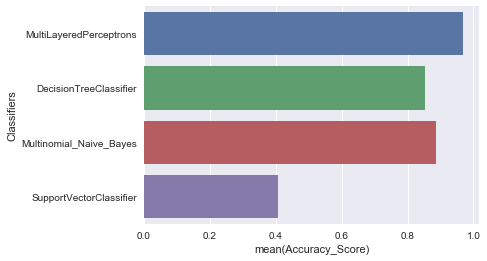

In [20]:
#create a final barplot
sns.barplot(x=df['Accuracy_Score'],y=df['Classifiers'],data=df)